<a href="https://colab.research.google.com/github/vpatil2209/Machine_Learning/blob/master/Rainfall.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('weatherAUS.csv')
df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [10]:
df.fillna(df.mean(), inplace=True)

In [11]:
df.head(20)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.600000,5.469824,7.624853,W,44.0,W,WNW,20.000000,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.000000,5.469824,7.624853,WNW,44.0,NNW,WSW,4.000000,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.000000,5.469824,7.624853,WSW,46.0,W,WSW,19.000000,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.000000,5.469824,7.624853,NE,24.0,SE,E,11.000000,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.000000,5.469824,7.624853,W,41.0,ENE,NW,7.000000,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.200000,5.469824,7.624853,WNW,56.0,W,W,19.000000,24.0,55.0,23.0,1009.2,1005.4,4.437189,4.503167,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.000000,5.469824,7.624853,W,50.0,SW,W,20.000000,24.0,49.0,19.0,1009.6,1008.2,1.000000,4.503167,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.000000,5.469824,7.624853,W,35.0,SSE,W,6.000000,17.0,48.0,19.0,1013.4,1010.1,4.437189,4.503167,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.000000,5.469824,7.624853,NNW,80.0,SE,NW,7.000000,28.0,42.0,9.0,1008.9,1003.6,4.437189,4.503167,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.400000,5.469824,7.624853,W,28.0,S,SSE,15.000000,11.0,58.0,27.0,1007.0,1005.7,4.437189,4.503167,20.1,28.2,Yes,0.0,No


In [15]:
# Label encoding values
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()  
df['RainTomorrow']= label_encoder.fit_transform(df['RainTomorrow'])

                MinTemp   MaxTemp  Rainfall  ...   Temp3pm   RISK_MM  RainTomorrow
MinTemp        1.000000  0.733919  0.103314  ...  0.699828  0.123928      0.083717
MaxTemp        0.733919  1.000000 -0.074202  ...  0.969735 -0.044154     -0.159087
Rainfall       0.103314 -0.074202  1.000000  ... -0.077553  0.301844      0.236874
Evaporation    0.353698  0.442214 -0.038186  ...  0.429195 -0.031569     -0.089551
Sunshine       0.051907  0.331505 -0.173011  ...  0.349271 -0.222487     -0.327029
WindGustSpeed  0.173331  0.066329  0.127250  ...  0.032274  0.156620      0.225264
WindSpeed9am   0.174946  0.014586  0.085977  ...  0.005026  0.068828      0.090524
WindSpeed3pm   0.174187  0.050381  0.056762  ...  0.028443  0.048554      0.086909
Humidity9am   -0.232372 -0.499777  0.221392  ... -0.492430  0.170541      0.255158
Humidity3pm    0.005913 -0.499725  0.249609  ... -0.555777  0.306711      0.439678
Pressure9am   -0.424357 -0.309093 -0.159676  ... -0.266308 -0.156060     -0.234027
Pres

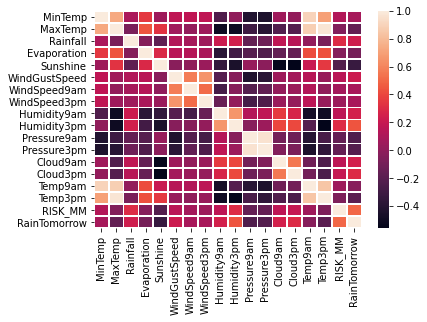

In [18]:
# Finding correlation
cor = df.corr()
print(cor)
sns.heatmap(cor, fmt = " ", linewidths = 0.70)

In [23]:
# Splitting df into X and y
X = df.iloc[:, [2, 3, 4, 22]].values
y = df.iloc[:, 23].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [25]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [30]:
from sklearn.metrics import confusion_matrix, accuracy_score

# ***Logistic Regression***

[0 0 0 ... 0 1 0]
Accuracy Score 0.9998312188809811
Confusion Matrix  [[27543     0]
 [    6  8000]]


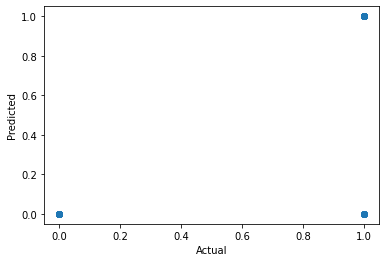

In [35]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
#print(y_pred)
ac = accuracy_score(y_test, y_pred)
print('Accuracy Score', ac)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix ', cm)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# ***Decision Tree Classifier***

[0 0 0 ... 0 1 0]
Accuracy Score 1.0
Confusion Matrix [[27543     0]
 [    0  8006]]


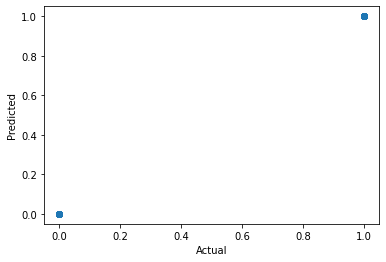

In [36]:
# Decision tree 
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)
print(y_pred)
ac = accuracy_score(y_test, y_pred)
print('Accuracy Score', ac)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix', cm)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

## ***Random Forest Classifier***

[0 0 0 ... 0 1 0]
Accuracy Score 1.0
Confusion Matrix [[27543     0]
 [    0  8006]]


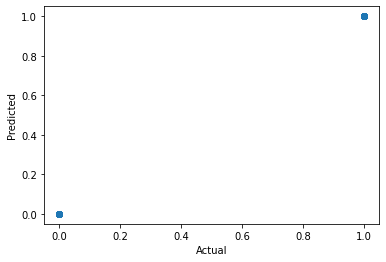

In [37]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf = clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)
print(y_pred)
ac = accuracy_score(y_test, y_pred)
print('Accuracy Score', ac)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix', cm)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()